<a href="https://colab.research.google.com/github/ElenaBetelgeuse/A-B-TESTS/blob/main/%D0%94%D0%B8%D1%81%D0%BF%D0%B5%D1%80%D1%81%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B8_A_B_%D1%82%D0%B5%D1%81%D1%82%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Дисперсионный анализ и A/B-тесты

Ниже представлено несколько блоков задач. Пожалуйста, выполните их в этом ноутбуке, загрузите в [Google Colab](https://colab.research.google.com/notebooks/welcome.ipynb?hl=ru) и предоставьте ссылку на него эксперту через Личный Кабинет.

In [ ]:
 # Подгрузим пакеты
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

### Блок 1

##### Задание № 1
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.

In [ ]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

# Напишите Ваш код для решения задачи
stat, p = stats.ttest_ind(A, B, equal_var = False)

print(f"Статистика = {stat:.5f}, p = {p:.10f}")
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = -1.73380, p = 0.0851112347
Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые


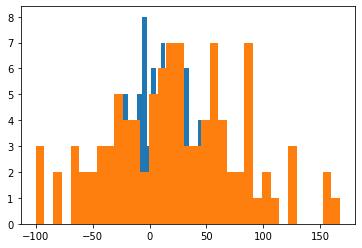

In [ ]:
plt.hist(A, bins=35); #Выборка A
plt.hist(B, bins=35);  #Выборка B

##### Задание № 2
Допустим, вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы — водой с удобнением, третью группу огурцов будем поливать минералкой.
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой?
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`

Нулевая гипотеза: water=nutri=mineral
Альтернативная гипотеза: !(water=nutri=mineral)
Результат:
отклоняем нулевую гипотезу
Полученное f-значение 13.033419023136258


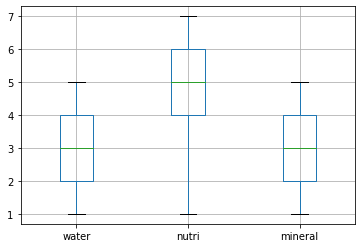

In [ ]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

# Напишите Ваш код для решения задачи

# Так как все массивы должны быть одинаковой длины, а в списк water не хватает одного значения для равенства длин, добавим в список water ещё одно значение  - моду по списку.

data =\
    pd.DataFrame({
        'water': [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1,max(set(water), key=water.count)],
        'nutri': [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5],
        'mineral': [2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]
    })
data.boxplot()
print('Нулевая гипотеза:', '='.join(data))
print('Альтернативная гипотеза:', f'!({"=".join(data)})')
# Общая средняя
grand_mean = data.values.flatten().mean()
# Общая сумма квадратов sst = ssb + ssw
sst = sum((val - grand_mean)**2 for val in data.values.flatten())
# Отклонение групповых средний от общей средней
ssb = sum(data[group].size * (group_mean - grand_mean) ** 2 for group, group_mean in data.mean().items())
# Отклонения значений внутри группы от средней группы
ssw = sum(sum((x - group_mean)**2 for x in data[group]) for group, group_mean in data.mean().items())

groups = data.shape[1]
# Степени свободы
dfb = groups - 1
dfw = data.size - groups
# Межгрупповой средний квадрат
mssb = ssb/dfb
# Внутригрупповой средний квадрат
mssw = ssw/dfw

f_value = mssb/mssw

p = stats.f.sf(f_value, dfb, dfw)
print('Результат:')
if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')
print(f"Полученное f-значение {f_value}")

In [ ]:
# Из графика видно, что наиболее эффективный способ поливать огурцы водой с удобрением. Два других способа имеют одинаковые между собой и менее продуктивные, чем способ с удобрениями, результаты.

### Блок 2
#### Cookie Cats

Cookie Cats — чрезвычайно популярная мобильная игра, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки.

По мере прохождения уровней игроки время от времени сталкиваются с воротами, которые заставляют их ждать или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота дают игрокам вынужденный перерыв в игре, что, как мы надеемся, приведёт к увеличению времени, проведённому в игре, и продлению удовольствия от игры.

<b>Но где ставить ворота? </b>
Изначально первые ворота были размещены на уровне `30`. В этом проекте вам предлагается проанализировать A/B-тест, в котором создатели переместили первые ворота в Cookie Cats с `30` уровня на уровень `40`. В частности, вам надо рассмотреть влияние A/B-теста на удержание игроков.

In [ ]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.head()

<ipython-input-5-e392f90565af>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90 189 игроков, которые установили игру во время проведения A/B-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.
* `version` - был ли игрок помещён в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).
* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - игрок вернулся и поиграл через 1 день после установки?
* `retention_7` - игрок вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

#### Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот.
    
**Замечание:** приведённых вспомогательных фрагментов кода не хватает для ответа на вопрос.

Делать выводы необходимо, опираясь на статистические тесты, разобранные в лекции.

Большим плюсом будет построение визуализиции для подтверждения ваших выводов. Рекомендуем использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и `matplotlib`

In [ ]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


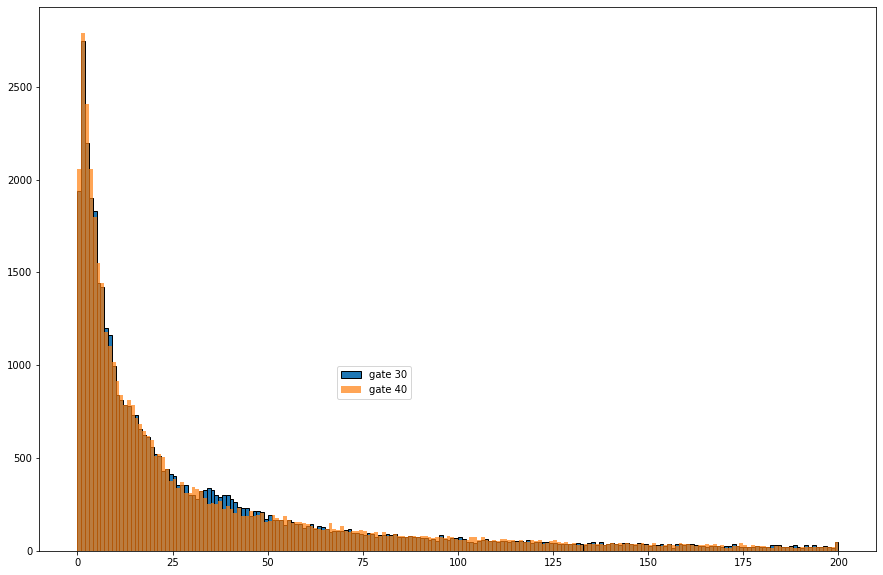

In [ ]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1, edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

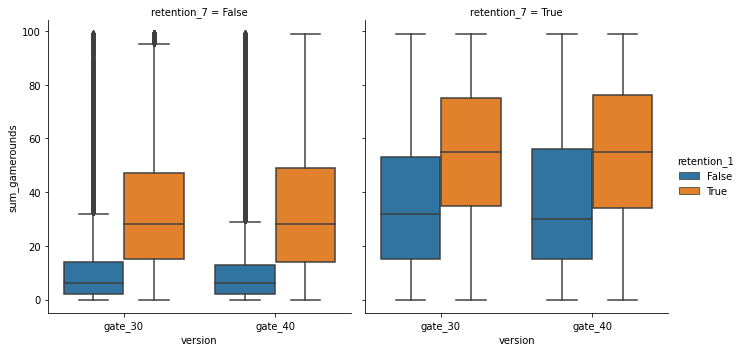

In [ ]:
df = data.loc[data['sum_gamerounds'] < 100].copy();


sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95);


<Axes: ylabel='Density'>

<Figure size 1080x720 with 0 Axes>

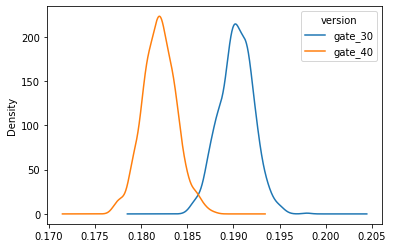

In [ ]:
#Если вдруг оказалось сложно, то вот ещё один способ визуализации различий
plt.figure(figsize=(15, 10))

boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()  #retention_1
    boot_1d.append(boot_mean)

# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
boot_1d.plot(kind='density')

<span style="color:red">**ВОТ ТУТ ЯЧЕЙКА НИЖЕ - ЭТО, ПО СУТИ, РЕШЕНИЕ ЗАДАЧИ. УБРАТЬ БЫ ЕЁ ТОГДА**</span>

In [ ]:
from scipy.stats import f_oneway
#from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

f, p = f_oneway(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
f, p
#stat, p = mannwhitneyu(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
#print('Statistics=%.3f, p=%.3f' % (stat, p))

(0.7939569526814368, 0.3729086824696095)

In [ ]:
from scipy.stats import f_oneway
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

# Напишите Ваш код для решения задачи
stat, p = mannwhitneyu(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])

print('Статистика=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')


Статистика=1024331250.500, p=0.050
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


In [ ]:
# Значение p-value пограничное, поэтому лучше проверить более тщательно.

<Axes: ylabel='Density'>

<Figure size 1080x720 with 0 Axes>

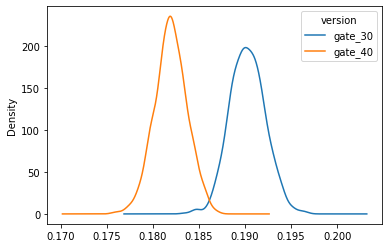

In [ ]:
plt.figure(figsize=(15, 10))
# boot_1d - собираем статистику по средним, для неё можно применить t-тест
boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac=1, replace=True).groupby(
        'version')['retention_7'].mean()  # retention_1
    boot_1d.append(boot_mean)

# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)

# График полученного распределения
boot_1d.plot(kind='density')

In [ ]:
# Прежде чем использовать t-тест, необходимо проверить равенство дисперссий. Сделаем это с помощью F-теста. Используем собстенную функцию.

In [ ]:
def f_test(group1, group2):
    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    nun = group1.size-1
    dun = group2.size-1
    p_value = 1-stats.f.cdf(f, nun, dun)
    return f, p_value

In [ ]:
stat, p = f_test(boot_1d['gate_30'], boot_1d['gate_40'])

print('Статистика=%.3f, p=%.5f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, дисперссии, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, дисперссии, вероятно, различаются')

Статистика=1.182, p=0.00409
Отклоняем нулевую гипотезу, дисперссии, вероятно, различаются


In [ ]:
# Дисперсии отличаются, поэтому нужно использовать поправку Уэлча.

In [ ]:
stat, p = stats.ttest_ind(boot_1d['gate_30'], boot_1d['gate_40'], equal_var = False)
print('Статистика=%.3f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика=101.479, p=0.0000000000
Отклоняем нулевую гипотезу, средние, вероятно, различаются


In [ ]:
# Выводы.
# Наше значение  p  близко к нулю, поэтому мы отвергаем нулевую гипотезу о том, что средние значения двух выборок одинаковые. То есть существует статистически значимая разница между тем где поставить ворота!
# То есть, лучше ставить ворота на 30-й гейт, а не на 40-й.

Ниже, пожалуйста, напишите Ваши выводы на основании решения:

### Блок 3
#### Покемоны и A/B-тестирование

Покемоны — это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) и относятся к одному или двум так называемым классам (вода, огонь и т. д.).

Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex.

**Описание набора данных**
Профессор Оук скопировал всё содержимое в память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

**Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается, что они имеют одинаковую значимость.**

In [ ]:
# Откроем датасет

pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)
pokemon.head()

<ipython-input-16-1e6d6fedfab1>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [ ]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pid        800 non-null    int64 
 1   Name       799 non-null    object
 2   Class 1    800 non-null    object
 3   Class 2    414 non-null    object
 4   HP         800 non-null    int64 
 5   Attack     800 non-null    int64 
 6   Defense    800 non-null    int64 
 7   Sp. Atk    800 non-null    int64 
 8   Sp. Def    800 non-null    int64 
 9   Speed      800 non-null    int64 
 10  Legendary  800 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 63.4+ KB


**Задание № 1**
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем покемоны в классе `rock`. Проверьте, прав ли он, и убедите его в своём выводе статистически.
    
Примечание:
- покемоны, которые относятся к обоим классам, не должны входить в выборку;
- Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

In [ ]:
df = pokemon.copy()
df = df[['pid','Class 1', 'Class 2', 'Attack']]
df = df[df.isin({'Grass', 'Rock'}).any(1)]
df_1 = df[['pid','Class 1', 'Attack']]
df_2 = df[['pid','Class 2', 'Attack']]
df_1.rename(columns = {'Class 1': 'Class'}, inplace = True)
df_2.rename(columns = {'Class 2': 'Class'}, inplace = True)
data = pd.concat([df_1, df_2], axis=0)
#data = data.set_index('pid')
data = data[data.isin({'Grass', 'Rock'}).any(1)]
data

<ipython-input-18-dae2680646ec>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.rename(columns = {'Class 1': 'Class'}, inplace = True)
<ipython-input-18-dae2680646ec>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.rename(columns = {'Class 2': 'Class'}, inplace = True)


,pid,Class,Attack
0,1,Grass,49
1,2,Grass,62
2,3,Grass,82
3,4,Grass,100
48,49,Grass,50
...,...,...,...
783,784,Grass,66
784,785,Grass,90
785,786,Grass,85
786,787,Grass,95


In [ ]:
data = data.drop_duplicates (subset=['pid'], keep=False)
data

,pid,Class,Attack
0,1,Grass,49
1,2,Grass,62
2,3,Grass,82
3,4,Grass,100
48,49,Grass,50
...,...,...,...
783,784,Grass,66
784,785,Grass,90
785,786,Grass,85
786,787,Grass,95


In [ ]:
data.groupby('Class').Class.count()

Class
Grass    93
Rock     56
Name: Class, dtype: int64

In [ ]:
data.groupby('Class').sum()

,pid,Attack
Class,,
Grass,39893,6857
Rock,23648,5140


In [ ]:
data.groupby('Class').mean()

,pid,Attack
Class,,
Grass,428.956989,73.731183
Rock,422.285714,91.785714


In [ ]:
c_grass = data[data['Class'] == 'Grass']
c_rock = data[data['Class'] == 'Rock']

In [ ]:
c_grass.describe()

,pid,Attack
count,93.000000,93.000000
mean,428.956989,73.731183
std,242.327658,24.179645
min,1.000000,27.000000
25%,208.000000,59.000000
50%,459.000000,70.000000
75%,610.000000,95.000000
max,788.000000,132.000000


In [ ]:
c_rock.describe()

,pid,Attack
count,56.000000,56.000000
mean,422.285714,91.785714
std,229.699781,34.805284
min,81.000000,10.000000
25%,236.250000,63.000000
50%,393.000000,92.500000
75%,621.500000,116.250000
max,797.000000,165.000000


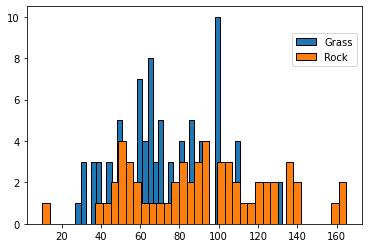

In [ ]:
plt.hist(c_grass['Attack'], bins=40, alpha=1, edgecolor='black', label='Grass'); # Grass
plt.hist(c_rock['Attack'], bins=40, alpha=1, edgecolor='black', label='Rock');  # Rock
plt.legend(loc='upper right', bbox_to_anchor=(1.0, 0.90))
plt.show()

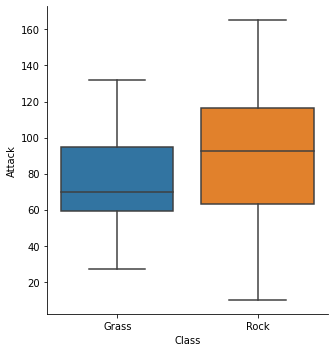

In [ ]:
sns.catplot(x="Class", y="Attack",
            data=data, kind="box",
            height=5, aspect=.95);

In [ ]:
from scipy.stats import f_oneway
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

stat, p = mannwhitneyu(data[data['Class'] == 'Grass']['Attack'], data[data['Class'] == 'Rock']['Attack'])

print('Статистика=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')


Статистика=1816.500, p=0.002
Отклоняем нулевую гипотезу, распределения, вероятно, различаются


<Axes: ylabel='Density'>

<Figure size 1080x720 with 0 Axes>

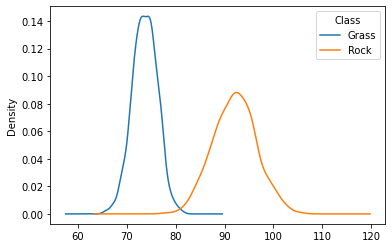

In [ ]:
plt.figure(figsize=(15, 10))
# boot_1d - собираем статистику по средним, для неё можно применить t-тест
boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac=1, replace=True).groupby('Class')['Attack'].mean()
    boot_1d.append(boot_mean)

# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)

# График полученного распределения
boot_1d.plot(kind='density')

In [ ]:
def f_test(group1, group2):
    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    nun = group1.size-1
    dun = group2.size-1
    p_value = 1-stats.f.cdf(f, nun, dun)
    return f, p_value

In [ ]:
stat, p = f_test(boot_1d['Grass'], boot_1d['Rock'])

print('Статистика=%.3f, p=%.5f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, дисперссии, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, дисперссии, вероятно, различаются')

Статистика=0.331, p=1.00000
Не отклоняем нулевую гипотезу, дисперссии, вероятно, одинаковые


In [ ]:
stat, p = stats.ttest_ind(boot_1d['Grass'], boot_1d['Rock'])
print('Статистика=%.3f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика=-113.928, p=0.0000000000
Отклоняем нулевую гипотезу, средние, вероятно, различаются


In [ ]:
# Из графиков и тестов видно, что покемоны в классе Rock имеют более сильную обычную атаку, чем покемоны в классе Grass.

**Задание № 2**
    
Профессор Оук уже долго не может спать по ночам, ведь его волнует вопрос: а правда ли, что покемоны в классе `Water` в среднем быстрее покемонов в классе `Normal`.

Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание:
- покемоны, которые относятся к обоим классам, не должны входить в выборку;
- Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

In [ ]:
df = pokemon.copy()
df = df[['pid','Class 1', 'Class 2', 'Speed']]
df = df[df.isin({'Water', 'Normal'}).any(1)]
df_1 = df[['pid','Class 1', 'Speed']]
df_2 = df[['pid','Class 2', 'Speed']]
df_1.rename(columns = {'Class 1': 'Class'}, inplace = True)
df_2.rename(columns = {'Class 2': 'Class'}, inplace = True)
data = pd.concat([df_1, df_2], axis=0)
#data = data.set_index('pid')
data = data[data.isin({'Water', 'Normal'}).any(1)]
data = data.drop_duplicates (subset=['pid'], keep=False)
data

<ipython-input-33-1061e63c12a7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.rename(columns = {'Class 1': 'Class'}, inplace = True)
<ipython-input-33-1061e63c12a7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.rename(columns = {'Class 2': 'Class'}, inplace = True)


,pid,Class,Speed
9,10,Water,43
10,11,Water,58
11,12,Water,78
12,13,Water,78
20,21,Normal,56
...,...,...,...
759,760,Water,68
760,761,Water,30
764,765,Normal,70
765,766,Normal,109


In [ ]:
c_water = data[data['Class'] == 'Water']
c_normal = data[data['Class'] == 'Normal']

In [ ]:
c_water.describe()

,pid,Speed
count,125.0000,125.00000
mean,345.3680,64.93600
std,216.5333,22.74889
min,10.0000,15.00000
25%,150.0000,50.00000
50%,308.0000,65.00000
75%,509.0000,81.00000
max,800.0000,122.00000


In [ ]:
c_normal.describe()

,pid,Speed
count,101.000000,101.000000
mean,367.435644,72.257426
std,225.858337,28.427330
min,21.000000,5.000000
25%,177.000000,50.000000
50%,325.000000,72.000000
75%,565.000000,93.000000
max,766.000000,135.000000


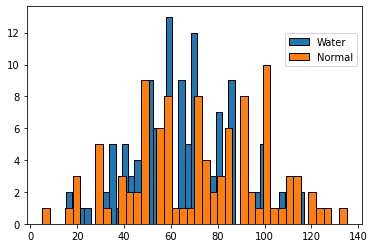

In [ ]:
plt.hist(c_water['Speed'], bins=40, alpha=1, edgecolor='black', label='Water'); # Water
plt.hist(c_normal['Speed'], bins=40, alpha=1, edgecolor='black', label='Normal');  # Normal
plt.legend(loc='upper right', bbox_to_anchor=(1.0, 0.90))
plt.show()

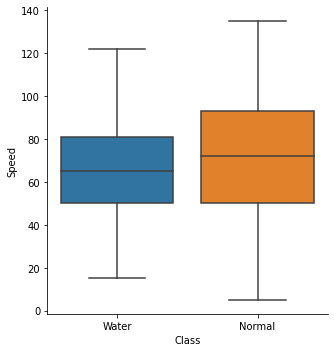

In [ ]:
sns.catplot(x="Class", y="Speed",
            data=data, kind="box",
            height=5, aspect=.95);

In [ ]:
stat, p = mannwhitneyu(data[data['Class'] == 'Water']['Speed'], data[data['Class'] == 'Normal']['Speed'])

print('Статистика=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика=5299.500, p=0.038
Отклоняем нулевую гипотезу, распределения, вероятно, различаются


<Axes: ylabel='Density'>

<Figure size 1080x720 with 0 Axes>

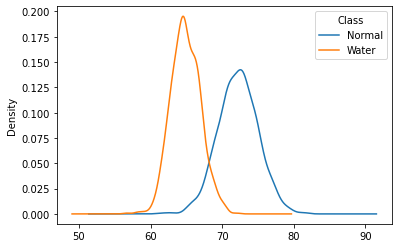

In [ ]:
plt.figure(figsize=(15, 10))
# boot_1d - собираем статистику по средним, для неё можно применить t-тест
boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac=1, replace=True).groupby('Class')['Speed'].mean()
    boot_1d.append(boot_mean)

# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)

# График полученного распределения
boot_1d.plot(kind='density')

In [ ]:
stat, p = f_test(boot_1d['Water'], boot_1d['Normal'])

print('Статистика=%.3f, p=%.5f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, дисперссии, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, дисперссии, вероятно, различаются')

Статистика=0.540, p=1.00000
Не отклоняем нулевую гипотезу, дисперссии, вероятно, одинаковые


In [ ]:
stat, p = stats.ttest_ind(boot_1d['Water'], boot_1d['Normal'])
print('Статистика=%.3f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика=-67.254, p=0.0000000000
Отклоняем нулевую гипотезу, средние, вероятно, различаются


In [ ]:
# Из графиков и тестов видно, что покемоны в классе Normal в среднем быстрее покемонов в классе Water.

**Задание № 3:**
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона.
Однако мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку некоторым покемонам (массив `treathed_pokemon`).
Проверьте, работает ли вообще его сыворотка, и убедите всех в своем выводе статистически.
    
    
*Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.*

In [ ]:
# Покемоны, которые принимали сыворотку
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

In [ ]:
df = pokemon.copy()
df = df[['Name', 'Speed']]
df = df.set_index('Name')

df_treated = df.copy().loc[treathed_pokemon]
df_untreated = df.copy()
df_untreated.drop(['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny'], inplace = True)

In [ ]:
df_treated

,Speed
Name,
Mega Beedrill,145
Mega Alakazam,150
Deoxys Normal Forme,150
Mega Lopunny,135


In [ ]:
df_untreated

,Speed
Name,
Bulbasaur,45
Ivysaur,60
Venusaur,80
Mega Venusaur,80
Charmander,65
...,...
Diancie,50
Mega Diancie,110
Hoopa Confined,70


In [ ]:
df_treated.describe()

,Speed
count,4.000000
mean,145.000000
std,7.071068
min,135.000000
25%,142.500000
50%,147.500000
75%,150.000000
max,150.000000


In [ ]:
df_untreated.describe()

,Speed
count,796.000000
mean,67.891960
std,28.614785
min,5.000000
25%,45.000000
50%,65.000000
75%,90.000000
max,180.000000


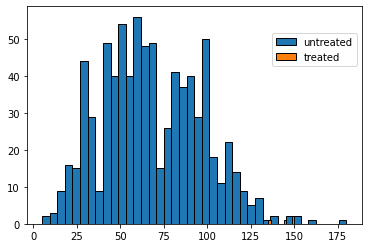

In [ ]:
plt.hist(df_untreated['Speed'], bins=40, alpha=1, edgecolor='black', label='untreated');  # untreated
plt.hist(df_treated['Speed'], bins=10, alpha=1, edgecolor='black', label='treated'); # treated
plt.legend(loc='upper right', bbox_to_anchor=(1.0, 0.90))
plt.show()

In [ ]:
df_new_1 = df_treated.copy()
df_new_2 = df_untreated.copy()
df_new_1['Treat'] = 'treated'
df_new_2['Treat'] = 'untreated'
df_new = pd.concat([df_new_1, df_new_2], axis=0)
df_new

,Speed,Treat
Name,,
Mega Beedrill,145,treated
Mega Alakazam,150,treated
Deoxys Normal Forme,150,treated
Mega Lopunny,135,treated
Bulbasaur,45,untreated
...,...,...
Diancie,50,untreated
Mega Diancie,110,untreated
Hoopa Confined,70,untreated


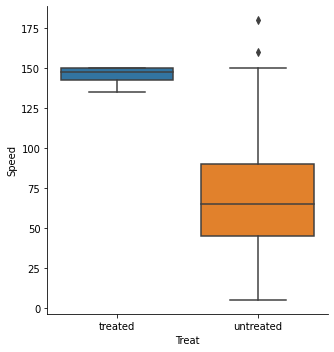

In [ ]:
sns.catplot(x="Treat", y="Speed",
            data=df_new, kind="box",
            height=5, aspect=.95);

In [ ]:
stat, p = mannwhitneyu(df_new[df_new['Treat'] == 'treated']['Speed'], df_new[df_new['Treat'] == 'untreated']['Speed'])

print('Статистика=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика=3164.500, p=0.001
Отклоняем нулевую гипотезу, распределения, вероятно, различаются


<Axes: ylabel='Density'>

<Figure size 1080x720 with 0 Axes>

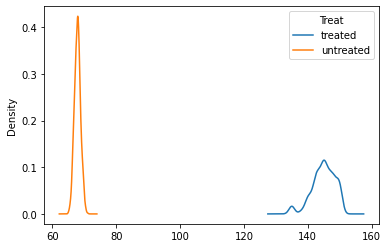

In [ ]:
plt.figure(figsize=(15, 10))
# boot_1d - собираем статистику по средним, для неё можно применить t-тест
boot_1d = []
for i in range(1000):
    boot_mean = df_new.sample(frac=1, replace=True).groupby('Treat')['Speed'].mean()
    boot_1d.append(boot_mean)

# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)

# График полученного распределения
boot_1d.plot(kind='density')

In [ ]:
stat, p = f_test(boot_1d['treated'], boot_1d['untreated'])

print('Статистика=%.3f, p=%.5f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, дисперссии, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, дисперссии, вероятно, различаются')

Статистика=13.977, p=0.00000
Отклоняем нулевую гипотезу, дисперссии, вероятно, различаются


In [ ]:
stat, p = stats.ttest_ind(boot_1d['treated'], boot_1d['untreated'], equal_var = False) # с поправкой Уэлча
print('Статистика=%.3f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика=nan, p=nan
Отклоняем нулевую гипотезу, средние, вероятно, различаются


In [ ]:
# Честно говоря, не поняла, почему не посчиталась статистика с p-value, но из графиков и прочих статистических показателей видно, что препарат таки заметно увеличивает скорость.

**Задание № 4**
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако профессор не очень уверен, что они лучше остальных покемонов.
Оук предложил разобраться в этом Вам.

Действительно ли сумма характеристик `HP`, `Attack`, `Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?

Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.

*Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.*

In [ ]:
df = pokemon.copy()
df = df[['Legendary', 'HP', 'Attack', 'Defense']]
df['Sum'] = df['HP'] + df['Attack'] + df['Defense']
df['Product'] = df['HP'] * df['Attack'] * df['Defense']
#df = df.set_index('Legendary')
df

,Legendary,HP,Attack,Defense,Sum,Product
0,False,45,49,49,143,108045
1,False,60,62,63,185,234360
2,False,80,82,83,245,544480
3,False,80,100,123,303,984000
4,False,39,52,43,134,87204
...,...,...,...,...,...,...
795,True,50,100,150,300,750000
796,True,50,160,110,320,880000
797,True,80,110,60,250,528000
798,True,80,160,60,300,768000


In [ ]:
gruopped = df.copy().groupby('Legendary').agg({'Attack': 'count'}).sort_values(by = 'Attack', ascending=False).reset_index()
gruopped

,Legendary,Attack
0,False,735
1,True,65


In [ ]:
df_legendary = df.copy()
df_legendary = df_legendary[df_legendary.Legendary == 1]
df_legendary = df_legendary[['Legendary','Sum', 'Product']]
df_normal = df.copy()
df_normal = df_normal[df_normal.Legendary == 0]
df_normal = df_normal[['Legendary','Sum', 'Product']]

In [ ]:
df_legendary.describe()

,Sum,Product
count,65.000000,6.500000e+01
mean,309.076923,1.085942e+06
std,46.429822,5.169911e+05
min,230.000000,1.800000e+05
25%,275.000000,6.885000e+05
50%,305.000000,1.000000e+06
75%,340.000000,1.350000e+06
max,440.000000,2.880000e+06


In [ ]:
df_normal.describe()

,Sum,Product
count,735.000000,7.350000e+02
mean,214.410884,4.250414e+05
std,64.359599,3.713542e+05
min,55.000000,2.500000e+03
25%,165.000000,1.512250e+05
50%,213.000000,3.315000e+05
75%,258.000000,5.735375e+05
max,440.000000,2.460000e+06


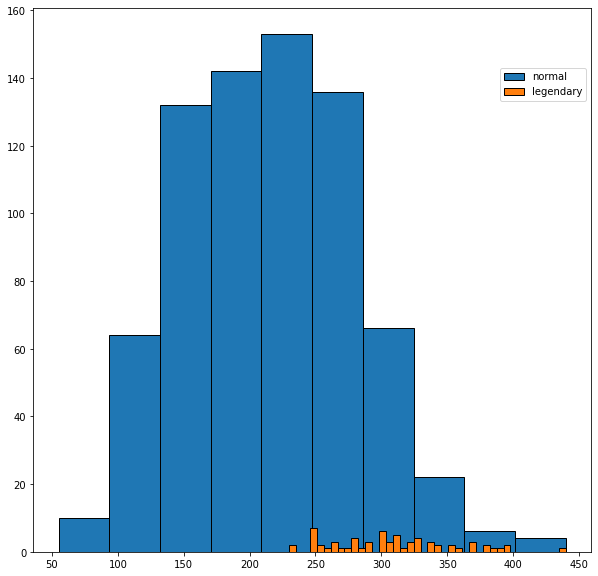

In [ ]:
plt.figure(figsize=(10,10))
plt.hist(df_normal['Sum'], bins=10, alpha=1, edgecolor='black', label='normal'); # normal
plt.hist(df_legendary['Sum'], bins=40, alpha=1, edgecolor='black', label='legendary');  # legendary
plt.legend(loc='upper right', bbox_to_anchor=(1.0, 0.90))

plt.show()

In [ ]:
df_new = pd.concat([df_legendary, df_normal], axis=0)
df_new

,Legendary,Sum,Product
156,True,275,765000
157,True,265,688500
158,True,280,810000
162,True,306,1049400
163,True,396,2014000
...,...,...,...
787,False,307,1037000
788,False,209,322575
789,False,396,2045160
790,False,105,42000


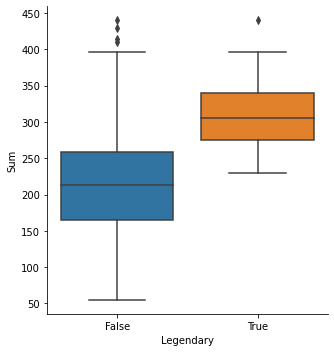

In [ ]:
sns.catplot(x="Legendary", y="Sum",
            data=df_new, kind="box",
            height=5, aspect=.95);

In [ ]:
stat, p = mannwhitneyu(df_new[df_new['Legendary'] == 1]['Sum'], df_new[df_new['Legendary'] == 0]['Sum'])

print('Статистика=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика=42199.000, p=0.000
Отклоняем нулевую гипотезу, распределения, вероятно, различаются


<Axes: ylabel='Density'>

<Figure size 1080x720 with 0 Axes>

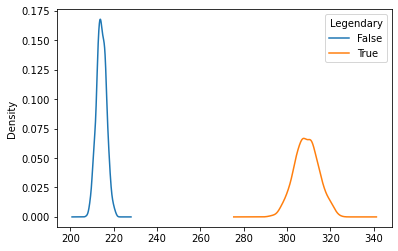

In [ ]:
plt.figure(figsize=(15, 10))
# boot_1d - собираем статистику по средним, для неё можно применить t-тест
boot_1d = []
for i in range(1000):
    boot_mean = df_new.sample(frac=1, replace=True).groupby('Legendary')['Sum'].mean()
    boot_1d.append(boot_mean)

# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)

# График полученного распределения
boot_1d.plot(kind='density')

In [ ]:
stat, p = f_test(boot_1d[1], boot_1d[0])

print('Статистика=%.3f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, дисперссии, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, дисперссии, вероятно, различаются')

Статистика=6.106, p=0.0000000000
Отклоняем нулевую гипотезу, дисперссии, вероятно, различаются


In [ ]:
stat, p = stats.ttest_ind(boot_1d[1], boot_1d[0], equal_var = False) # с поправкой Уэлча
print('Статистика=%.3f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика=498.164, p=0.0000000000
Отклоняем нулевую гипотезу, средние, вероятно, различаются


In [ ]:
# Из графиков и тестов видно, что сумма характеристик HP, Attack, Defense у легендарных покемонов выше, чем у других покемонов. Произведения должны отличаться ещё больше, чем суммы.

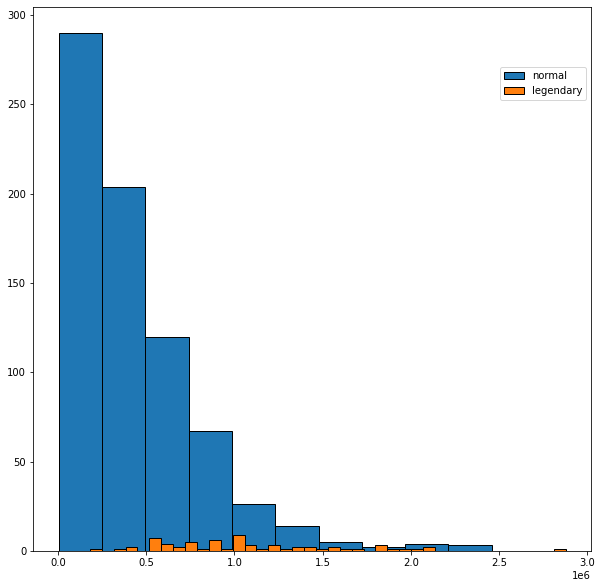

In [ ]:
plt.figure(figsize=(10,10))
plt.hist(df_normal['Product'], bins=10, alpha=1, edgecolor='black', label='normal'); # normal
plt.hist(df_legendary['Product'], bins=40, alpha=1, edgecolor='black', label='legendary');  # legendary
plt.legend(loc='upper right', bbox_to_anchor=(1.0, 0.90))
plt.show()

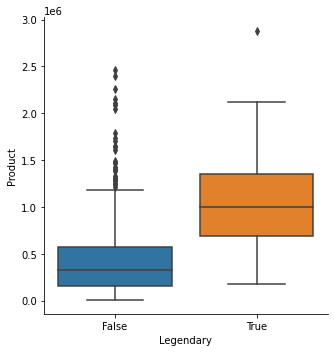

In [ ]:
sns.catplot(x="Legendary", y="Product",
            data=df_new, kind="box",
            height=5, aspect=.95);

In [ ]:
stat, p = mannwhitneyu(df_new[df_new['Legendary'] == 1]['Product'], df_new[df_new['Legendary'] == 0]['Product'])

print('Статистика=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика=42033.500, p=0.000
Отклоняем нулевую гипотезу, распределения, вероятно, различаются


<Axes: ylabel='Density'>

<Figure size 1080x720 with 0 Axes>

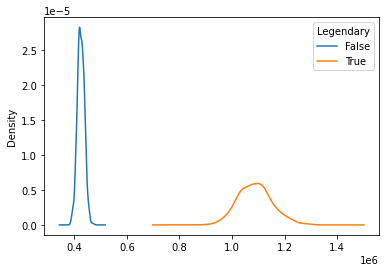

In [ ]:
plt.figure(figsize=(15, 10))
# boot_1d - собираем статистику по средним, для неё можно применить t-тест
boot_1d = []
for i in range(1000):
    boot_mean = df_new.sample(frac=1, replace=True).groupby('Legendary')['Product'].mean()
    boot_1d.append(boot_mean)

# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)

# График полученного распределения
boot_1d.plot(kind='density')

In [ ]:
stat, p = f_test(boot_1d[1], boot_1d[0])

print('Статистика=%.3f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, дисперссии, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, дисперссии, вероятно, различаются')

Статистика=23.474, p=0.0000000000
Отклоняем нулевую гипотезу, дисперссии, вероятно, различаются


In [ ]:
stat, p = stats.ttest_ind(boot_1d[1], boot_1d[0], equal_var = False) # с поправкой Уэлча
print('Статистика=%.3f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика=318.533, p=0.0000000000
Отклоняем нулевую гипотезу, средние, вероятно, различаются


In [ ]:
# Из графиков и тестов видно, что произведения характеристик HP, Attack, Defense у легендарных покемонов выше, чем у других покемонов. Произведения должны отличаться ещё больше, чем суммы.

**Задание № 5**
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса (массив `best_defence_class`), которые на его взгляд одинаковы по "силе обычной защиты" `Defense`.

Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо. Все та же статистика Вам в помощь!

*Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.*

In [ ]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']

In [ ]:
# сщздаём датафрейм, состоящий только из данных Defense с нужными нам четырьмя классами: Rock, Ground, Steel, Ice
df = pokemon.copy()
df = df[['pid','Class 1', 'Class 2', 'Defense']]
df = df[df.isin({'Rock', 'Ground','Steel','Ice'}).any(1)]
df_1 = df[['pid','Class 1', 'Defense']]
df_2 = df[['pid','Class 2', 'Defense']]
df_1.rename(columns = {'Class 1': 'Class'}, inplace = True)
df_2.rename(columns = {'Class 2': 'Class'}, inplace = True)
data = pd.concat([df_1, df_2], axis=0)
#data = data.set_index('pid')
data = data[data.isin({'Rock', 'Ground','Steel','Ice'}).any(1)]
data = data.drop_duplicates (subset=['pid'], keep=False)
data


<ipython-input-99-b34e0bc674ac>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.rename(columns = {'Class 1': 'Class'}, inplace = True)
<ipython-input-99-b34e0bc674ac>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.rename(columns = {'Class 2': 'Class'}, inplace = True)


,pid,Class,Defense
32,33,Ground,85
33,34,Ground,110
55,56,Ground,25
56,57,Ground,50
112,113,Ground,95
...,...,...,...
711,712,Ice,100
712,713,Ice,90
717,718,Steel,95
728,729,Ground,77


In [ ]:
# смотрим типы данных и нет ли пропусков
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 32 to 794
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pid      166 non-null    int64 
 1   Class    166 non-null    object
 2   Defense  166 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 5.2+ KB


In [ ]:
# смотрим, сколько значений по каждому классу
data.groupby('Class').Class.count()

Class
Ground    52
Ice       33
Rock      41
Steel     40
Name: Class, dtype: int64

In [ ]:
# создаём по списку значений Defense для каждого класса
c_rock = data[data['Class'] == 'Rock']
c_rock_list = c_rock['Defense'].tolist()

c_ground = data[data['Class'] == 'Ground']
c_ground_list = c_ground['Defense'].tolist()

c_steel = data[data['Class'] == 'Steel']
c_steel_list = c_steel['Defense'].tolist()

c_ice_list = data[data['Class'] == 'Ice']
c_ice_list = c_ice_list['Defense'].tolist()

In [ ]:
# смотрим на списки. из списков видно, что список для класса Rock имеет бОльшую длину из всех четырёх
print(c_rock_list)
print(c_ground_list)
print(c_steel_list)
print(c_ice_list)

[100, 125, 90, 105, 65, 85, 115, 110, 150, 135, 65, 85, 77, 97, 50, 100, 200, 40, 60, 95, 85, 105, 130, 45, 65, 90, 67, 115, 77, 119, 150, 150, 110, 230, 120, 85, 130, 85, 125, 103, 133]
[85, 110, 25, 50, 95, 110, 105, 60, 120, 45, 50, 80, 55, 105, 140, 160, 78, 118, 125, 40, 35, 45, 80, 84, 50, 80, 90, 90, 87, 77, 45, 85, 70, 90, 110, 90, 40, 70, 100, 43, 73, 105, 105, 68, 45, 65, 95, 115, 55, 75, 77, 121]
[140, 85, 125, 230, 80, 100, 130, 150, 150, 100, 86, 116, 120, 70, 95, 115, 129, 100, 150, 50, 150, 91, 70, 95, 140, 100, 140, 88, 95, 70, 88, 115, 106, 105, 91, 131, 70, 100, 112, 95]
[35, 100, 45, 15, 50, 80, 80, 50, 70, 90, 100, 110, 70, 50, 65, 85, 40, 80, 30, 85, 184, 80, 180, 80, 55, 50, 75, 105, 65, 107, 90, 100, 90]


In [ ]:
# преобразуем четыре списка в датафрейм с четырьмя стобцами и пустыми значениями там, где списой короче, чем Rock
df_concat = pd.DataFrame({'Rock': pd.Series(c_rock_list), 'Ground': pd.Series(c_ground_list),'Steel': pd.Series(c_steel_list),'Ice': pd.Series(c_ice_list)})
df_concat

In [ ]:
# Смотрим на данные. Видим, что три столбца стали типом Float, их нужно преобразовать в Integer, чтобы все типы данных были одинаковыми. Также видно, что имеются пустые значения, их необходимо заполнить.
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rock    41 non-null     float64
 1   Ground  52 non-null     int64  
 2   Steel   40 non-null     float64
 3   Ice     33 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.8 KB


In [ ]:
# Зполняем пустые значения целочисленными медианами по столбцу и преобразуем данные Float в Integer.
df_concat.fillna(int(df_concat['Rock'].median()), inplace = True)
df_concat.fillna(int(df_concat['Steel'].median()), inplace = True)
df_concat.fillna(int(df_concat['Ice'].median()), inplace = True)
df_concat[['Rock', 'Steel', 'Ice']] = df_concat[['Rock', 'Steel', 'Ice']].astype (int)
df_concat
data = df_concat.copy()
data

,Rock,Ground,Steel,Ice
0,100,85,140,35
1,125,110,85,100
2,90,25,125,45
3,105,50,230,15
4,65,95,80,50
5,85,110,100,80
6,115,105,130,80
7,110,60,150,50
8,150,120,150,70
9,135,45,100,90


Нулевая гипотеза: Rock=Ground=Steel=Ice
Альтернативная гипотеза: !(Rock=Ground=Steel=Ice)
Результат:
отклоняем нулевую гипотезу
Полученное f-значение 8.976496384968568


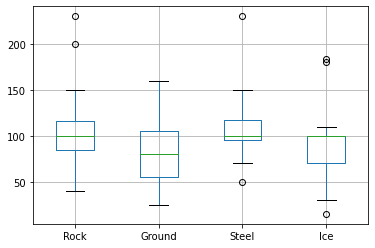

In [ ]:
# Делаем анализ.
data.boxplot()
print('Нулевая гипотеза:', '='.join(data))
print('Альтернативная гипотеза:', f'!({"=".join(data)})')
# Общая средняя
grand_mean = data.values.flatten().mean()
# Общая сумма квадратов sst = ssb + ssw
sst = sum((val - grand_mean)**2 for val in data.values.flatten())
# Отклонение групповых средний от общей средней
ssb = sum(data[group].size * (group_mean - grand_mean) ** 2 for group, group_mean in data.mean().items())
# Отклонения значений внутри группы от средней группы
ssw = sum(sum((x - group_mean)**2 for x in data[group]) for group, group_mean in data.mean().items())

groups = data.shape[1]
# Степени свободы
dfb = groups - 1
dfw = data.size - groups
# Межгрупповой средний квадрат
mssb = ssb/dfb
# Внутригрупповой средний квадрат
mssw = ssw/dfw

f_value = mssb/mssw

p = stats.f.sf(f_value, dfb, dfw)
print('Результат:')
if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')
print(f"Полученное f-значение {f_value}")

In [ ]:
# Согласно анализу и графику видно, что выборки различаются.